# Linear Regression

En este Notebook se va a trabajar en regesión lineal simple y múltiple. La data con la que se trabaja fue sacada de Kaggle y se utiliza con fines puramente educativos.


In [11]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

In [61]:
folder = 'linear_regression_files'
file_multiple = 'CarPrice_Assignment.csv'
file_simple = 'Salary_Data.csv'

df_simple = pd.read_csv(f"{folder}/{file_simple}")
df_multiple = pd.read_csv(f"{folder}/{file_multiple}")
df_simple = df_simple.astype('float')

## Simple Linear Regression

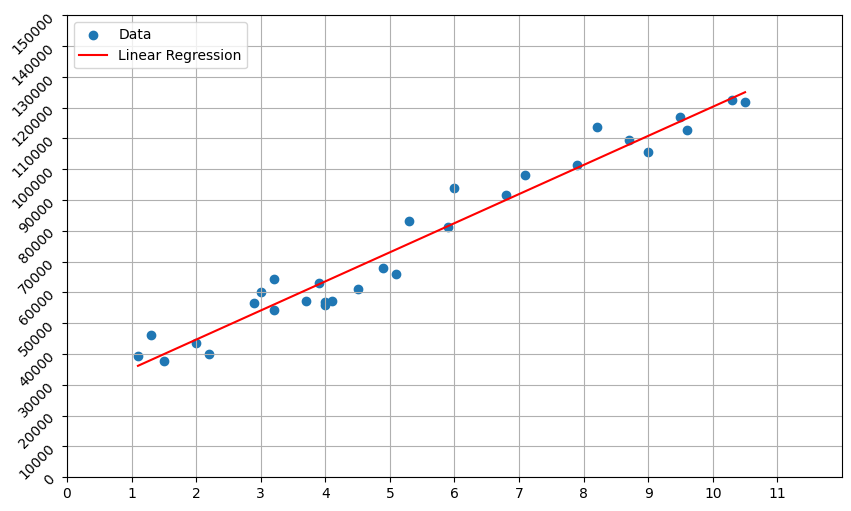

In [13]:
# Manual least squares

def least_squares(x, y):
    b1 = (np.sum((x - np.mean(x))*(y - np.mean(y))))/(np.sum((x - np.mean(x))**2))
    b0 = np.mean(y) - b1*np.mean(x)
    return [b0, b1]

def calculate_error(y_data, y_estimated):
    error = y_data - y_estimated
    return round(np.mean(error), 4)

# Calculate de least squares coefficientss
coeff_estimated = least_squares(df_simple['YearsExperience'], df_simple['Salary'])
y_estimated = df_simple['YearsExperience']*coeff_estimated[1] + coeff_estimated[0]

# Plot
plt.figure(figsize=(10,6))

plt.ylim([0, 150000])
plt.xlim([0, 12])
plt.yticks(np.arange(0, 160000, 10000), np.arange(0, 160000, 10000), rotation=45)
plt.xticks(np.arange(0, 12, 1))
plt.grid()

plt.scatter(df_simple['YearsExperience'], df_simple['Salary'], label='Data')
plt.plot(df_simple['YearsExperience'], y_estimated, color='red', label='Linear Regression')
plt.legend(loc='upper left')

plt.show()

### Usando scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

X = df_simple['YearsExperience'].values
print('Shape before reshape: ', X.shape)
X = X.reshape(-1, 1) # Vertical vector
print('Shape after reshape: ', X.shape)
Y = df_simple['Salary']

lin_reg.fit(X , Y)

coeff = [lin_reg.intercept_, lin_reg.coef_] 
# intercep is beta_0
# coef is beta_1 ... beta_n, only beta_1 in simple linear regresion

print(coeff)

Shape before reshape:  (30,)
Shape after reshape:  (30, 1)
[25792.200198668696, array([9449.96232146])]


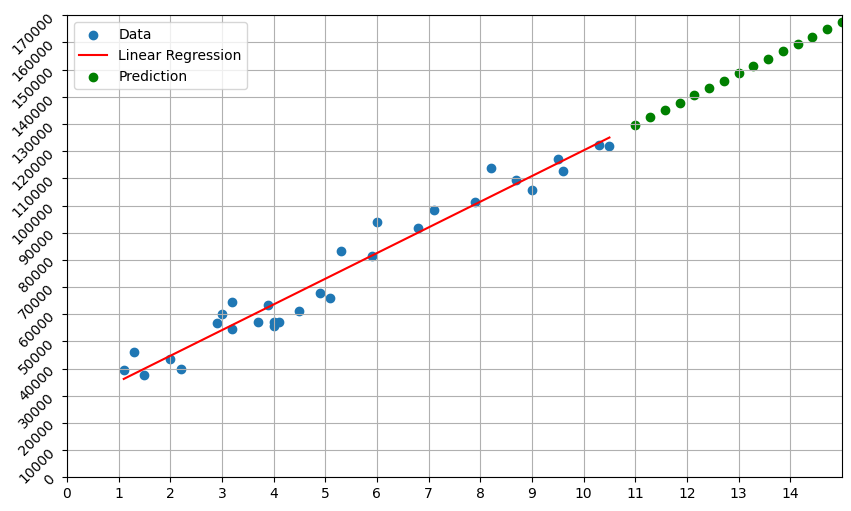

R2 is 0.9569566641435086


In [17]:
# Calculate de least squares coefficientss
Y_est = coeff[0] + X*coeff[1]

# Plot
plt.figure(figsize=(10,6))

plt.ylim([0, 170000])
plt.xlim([0, 15])
plt.yticks(np.arange(0, 180000, 10000), np.arange(0, 180000, 10000), rotation=45)
plt.xticks(np.arange(0, 15, 1))
plt.grid()

plt.scatter(X, Y, label='Data')
plt.plot(X, Y_est, color='red', label='Linear Regression')

# Predict
X_predict = np.linspace(11, 15, 15).reshape(-1, 1)
Y_predict = lin_reg.predict(X_predict)
plt.scatter(X_predict, Y_predict, label='Prediction', color='green')

plt.legend(loc='upper left')
plt.show()

R2 = lin_reg.score(X, Y)
print(f"R2 is {R2}")

Text(0, 0.5, 'Unidades vendidas')

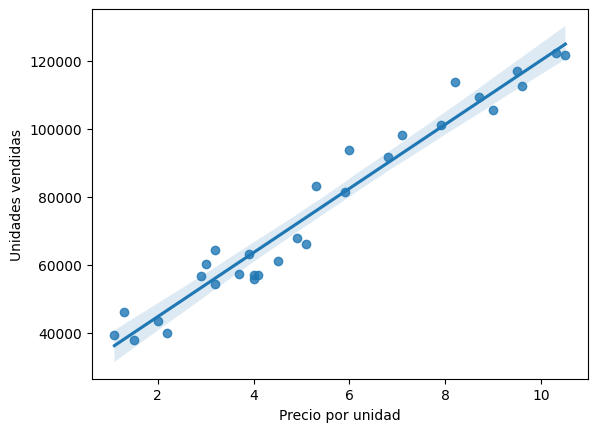

In [ ]:
ax = sns.regplot(x='YearsExperience', y='Salary', data=df_simple, ci=99)
ax.set_xlabel('Precio por unidad')
ax.set_ylabel('Unidades vendidas')

# plt.plot(X, Y_est, '--', color='r', label="Teorica",)

# Multiple Linear Regresion

In [18]:
df_multiple

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


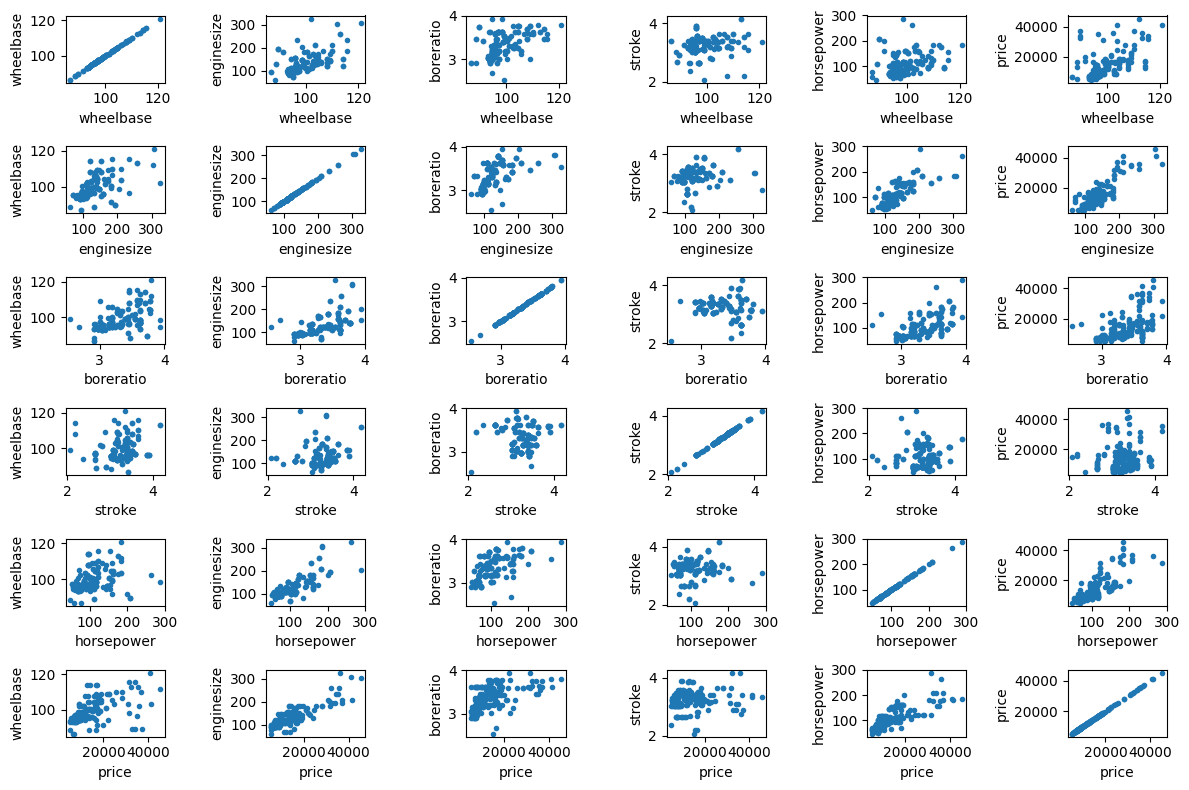

In [19]:
list = ['wheelbase', 'enginesize', 'boreratio', 'stroke', 'horsepower', 'price']

fig = plt.figure(figsize=(12,8))
axs = fig.subplots(len(list), len(list))

for i in range(len(list)):
    for j in range(len(list)):
        #plt.subplot(i, j)
        #plt.scatter(df_multiple[list[i]], df_multiple[list[j]])
        axs[i, j].scatter(df_multiple[list[i]], df_multiple[list[j]], marker='.')
        axs[i, j].set_ylabel(list[j])
        axs[i, j].set_xlabel(list[i])


fig.tight_layout()

In [21]:
df_multiple = pd.get_dummies(df_multiple, drop_first=True) #Generate dummies variables
Xm = df_multiple.copy()
Ym = Xm['price']
Xm = Xm.drop('price', axis=1)
print(f"Hay {Xm.shape[1]} features")

multi_reg = LinearRegression()

multi_reg.fit(Xm , Ym)
coeff = [multi_reg.intercept_, multi_reg.coef_]

R2 = multi_reg.score(Xm, Ym)
print(f"R2 is {R2}")

Hay 190 features
R2 is 0.9975856211766684


In [22]:
# importing metrics for linear regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

n = df_multiple.shape[0]
#Predictions
Yp = multi_reg.predict(Xm)

#Metrics
r2 = r2_score(Ym, Yp)
print(f"R2 = {r2}")

mae = mean_absolute_error(Ym, Yp)
print(f"MAE = {mae}")

mse = mean_squared_error(Ym, Yp)
print(f"MSE = {mse}")

msle = mean_squared_log_error(Ym, Yp)
print(f"MSLE = {msle}")

RSS = n * mse
RSE = np.sqrt(RSS/n)
TSS = RSS/(1 - r2) 
print(f'RSS = {RSS}')
print(f'RSE = {RSE}')
print(f'TSS = {TSS}')

R2 = 0.9975856211766684
MAE = 201.22730474854427
MSE = 153338.2515268847
MSLE = 0.0017970459354826839
RSS = 31434341.563011363
RSE = 391.5842840652376
TSS = 13019639361.993275


In [ ]:
for idx, col_name in enumerate(Xm.columns):
    print("The coefficient for {} is {}".format(col_name, multi_reg.coef_[idx]))

The coefficient for car_ID is 153.07577738629783
The coefficient for symboling is 725.6677082203903
The coefficient for wheelbase is 289.8182708929238
The coefficient for carlength is -223.96306028331855
The coefficient for carwidth is 707.879622857346
The coefficient for carheight is -461.83433383830015
The coefficient for curbweight is 10.847333029229048
The coefficient for enginesize is 55.5320619648337
The coefficient for boreratio is -3484.6058269744717
The coefficient for stroke is -1314.6571573420006
The coefficient for compressionratio is -1910.2102669708547
The coefficient for horsepower is -42.876418574724084
The coefficient for peakrpm is 3.2855239309064928
The coefficient for citympg is 309.29756561602335
The coefficient for highwaympg is -124.21827463607406
The coefficient for CarName_Nissan versa is 636.5139639202789
The coefficient for CarName_alfa-romero Quadrifoglio is 19389.57727352639
The coefficient for CarName_alfa-romero giulia is 11491.85929162606
The coefficient

In [23]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(Xm)
est = sm.OLS(Ym, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     60.35
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           6.35e-19
Time:                        12:42:55   Log-Likelihood:                -1514.8
No. Observations:                 205   AIC:                             3388.
Df Residuals:                      26   BIC:                             3982.
Df Model:                         178                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [24]:
threshold = 0.050
list_to_filter = []

for name, pvalue in est2.pvalues.items():
    if pvalue < threshold:
        print(f"{name} has a pvalue = {pvalue}")
        list_to_filter.append(name)
print(f"There are {len(list_to_filter)} features that they have p-value greater than 0.05")

car_ID has a pvalue = 0.025687298740654233
symboling has a pvalue = 0.033722586843955356
wheelbase has a pvalue = 0.03276602842807548
carlength has a pvalue = 0.006397576539281728
carwidth has a pvalue = 0.029217641898523085
curbweight has a pvalue = 0.0036502780460789474
compressionratio has a pvalue = 0.020255008138717404
peakrpm has a pvalue = 0.003099375706865638
CarName_alfa-romero Quadrifoglio has a pvalue = 0.010231961830400501
CarName_audi 100 ls has a pvalue = 0.01128644928323866
CarName_audi 4000 has a pvalue = 0.025974384520142037
CarName_bmw 320i has a pvalue = 0.010897961570930275
CarName_bmw x1 has a pvalue = 0.00017606769033850237
CarName_bmw x3 has a pvalue = 0.00023525501713596563
CarName_bmw x4 has a pvalue = 0.00016318438025380953
CarName_bmw x5 has a pvalue = 2.8707787021438907e-06
CarName_bmw z4 has a pvalue = 0.0003847702839678132
CarName_buick regal sport coupe (turbo) has a pvalue = 0.008095553371332389
CarName_chevrolet impala has a pvalue = 0.01470731656680436

In [25]:
Xmf = Xm[list_to_filter]

filter_multi_reg = sk.linear_model.LinearRegression()
filter_multi_reg.fit(Xmf, Ym)
coeff = [filter_multi_reg.intercept_, filter_multi_reg.coef_]

score = filter_multi_reg.score(Xmf, Ym)

In [ ]:
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(Xmf)
est = sm.OLS(Ym, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     32.44
Date:                Thu, 10 Nov 2022   Prob (F-statistic):           5.83e-57
Time:                        15:34:14   Log-Likelihood:                -1820.0
No. Observations:                 205   AIC:                             3798.
Df Residuals:                     126   BIC:                             4061.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

No necesariamente sacar las features con mayor pvalue generando una mejora en el ajuste. De hecho R2 aumento y varios features vieron incrementar su pvalue.

# Forward Selection

In [26]:
Xm

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


enginesize 1.354763759864529e-65


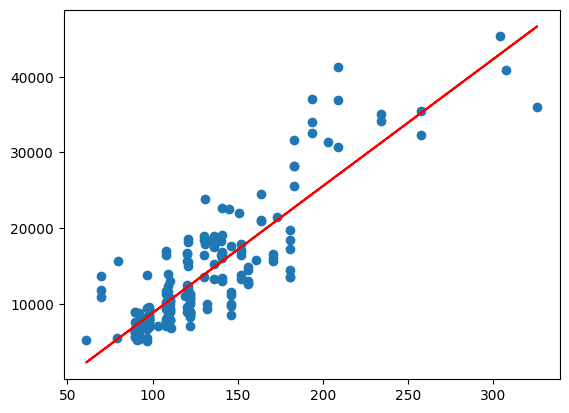

In [52]:
reg_lineal = LinearRegression()

import statsmodels.api as sm
from scipy import stats

less_pvalue = 1
less_name = None
for feature in Xm:
    # print(feature)
    Xf = Xm[feature].values.reshape(-1, 1)
    Xf_stats = None
    Xf_stats = sm.add_constant(Xf)
    est = sm.OLS(Ym, Xf_stats)
    est = est.fit()
    #print(est2.summary())
    pvalue = est.pvalues.loc['x1']
    if less_pvalue > pvalue:
        less_pvalue = pvalue
        less_name = feature
        # reg_lineal.fit(Xf, Ym)

print(less_name, less_pvalue)


X_less = Xm[less_name].values.reshape(-1, 1)
reg_lineal.fit(X_less, Ym)
Yp = reg_lineal.predict(Xm[less_name])

plt.scatter(X_less, Ym)
plt.plot(Xm[less_name], Yp)

In [72]:
folder = 'linear_regression_files'
file_multiple = 'CarPrice_Assignment.csv'
file_simple = 'Salary_Data.csv'

df_simple = pd.read_csv(f"{folder}/{file_simple}")
df_multiple = pd.read_csv(f"{folder}/{file_multiple}")

df_multiple = pd.get_dummies(df_multiple, drop_first=True) #Generate dummies variables
Xm = df_multiple.copy()
Ym = Xm['price']
Xm = Xm.drop('price', axis=1)


Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature
Actualizando list_feature


KeyboardInterrupt: 

array([[48.8],
       [64.1],
       [48.8],
       [64.1],
       [52.4],
       [65.5],
       [54.3],
       [66.2],
       [54.3],
       [66.4],
       [53.1],
       [66.3],
       [55.7],
       [71.4],
       [55.7],
       [71.4],
       [55.9],
       [71.4],
       [52. ],
       [67.9],
       [54.3],
       [64.8],
       [54.3],
       [64.8],
       [54.3],
       [64.8],
       [54.3],
       [64.8],
       [55.7],
       [66.9],
       [55.7],
       [66.9],
       [53.7],
       [67.9],
       [56.3],
       [70.9],
       [53.2],
       [60.3],
       [52. ],
       [63.6],
       [52. ],
       [63.6],
       [50.8],
       [63.8],
       [50.8],
       [63.8],
       [50.8],
       [63.8],
       [50.6],
       [63.8],
       [50.6],
       [63.8],
       [50.6],
       [63.8],
       [50.6],
       [63.8],
       [59.8],
       [64.6],
       [50.2],
       [66.3],
       [50.8],
       [63.9],
       [50.8],
       [63.9],
       [52.6],
       [64. ],
       [52